## Hidden loops experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from pathlib import Path
from statistics import NormalDist
%cd ..

/Users/andrey/MIPT_projects/M1P_6_sem/2023-Project-119


In [186]:
usage = 0.1
adherence = 0.9

In [187]:
# preparing our data
hidden_loops = Path(f"results/hidden_loops_e_{usage}_{adherence}")
means = []
deviations = []
p_values = []
steps = range(10, 1251, 10)

for folder in sorted(hidden_loops.iterdir()):
    if folder.name != '.DS_Store':
        for step in steps:
            data = pd.read_csv(f"{hidden_loops}/{folder.name}/deviations/ridge-dev_step_{step}.csv")

            mean = np.mean(data['y'] - data['y_pred'])
            deviation = np.std(data['y'] - data['y_pred'])
            _, p_value = normaltest(data['y'] - data['y_pred'])

            means.append(mean)
            deviations.append(deviation)
            p_values.append(p_value)

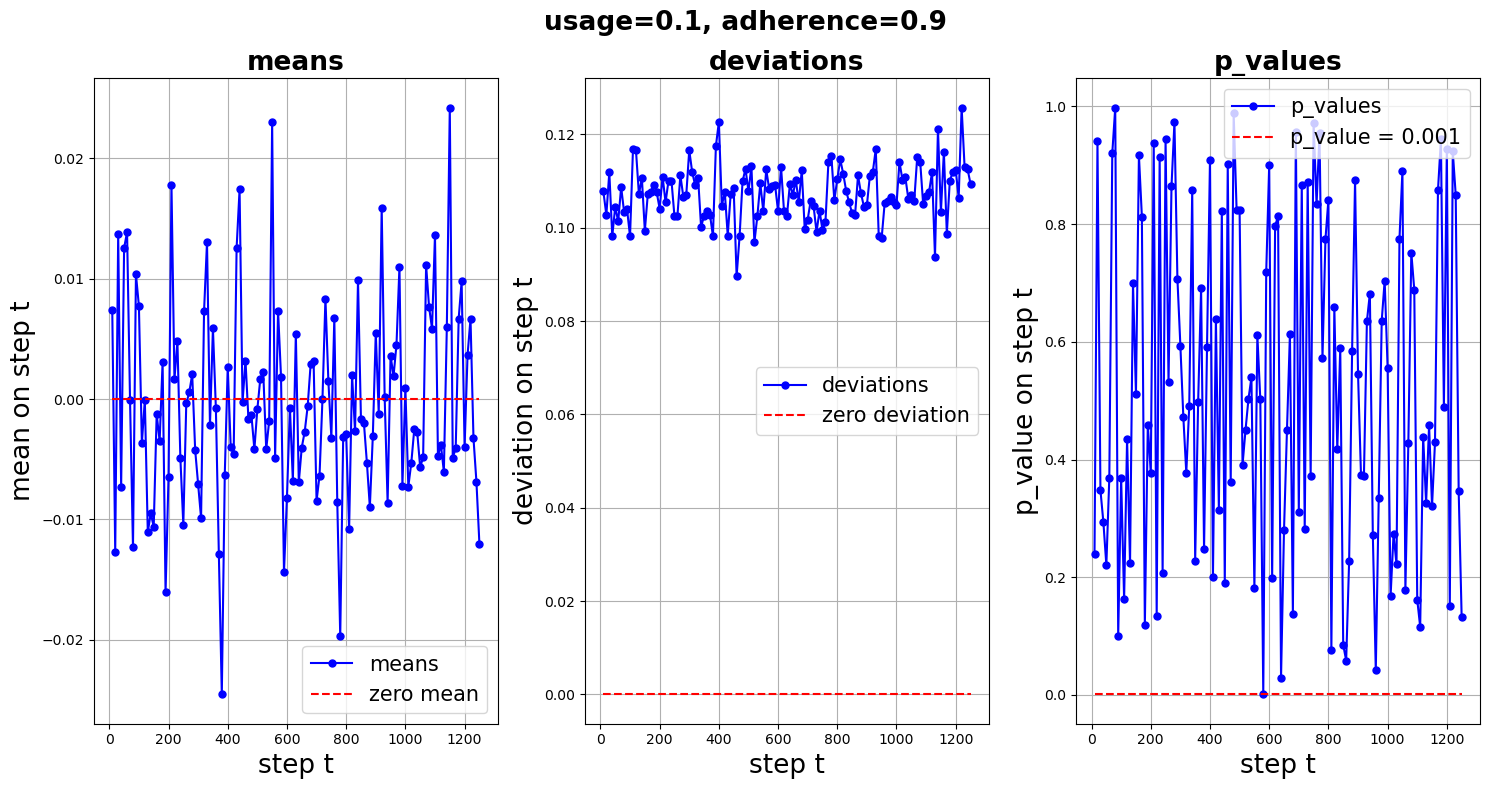

In [188]:
# plot means, deviations and p_values
plot, ax = plt.subplots(1, 3, figsize=(15, 8))
plot.suptitle(f"usage={usage}, adherence={adherence}", 
              fontsize=19, fontweight='bold')

ax[0].set_title("means", fontsize=19, fontweight='bold')
ax[0].plot(steps, means, label = "means", 
           color="blue", marker='o', markersize=5)
ax[0].plot(steps, [0]*len(steps), '--', color="red", label="zero mean")
ax[0].set_xlabel("step t", fontsize=19)
ax[0].set_ylabel("mean on step t", fontsize=19)
ax[0].legend(fontsize=15)
ax[0].grid()

ax[1].set_title("deviations", fontsize=19, fontweight='bold')
ax[1].plot(steps, deviations, label = "deviations", 
           color="blue", marker='o', markersize=5)
ax[1].plot(steps, [0]*len(steps), '--', color="red", label="zero deviation")
ax[1].set_xlabel("step t", fontsize=19)
ax[1].set_ylabel("deviation on step t", fontsize=19)
ax[1].legend(fontsize=15)
ax[1].grid()

ax[2].set_title("p_values", fontsize=19, fontweight='bold')
ax[2].plot(steps, p_values, label = "p_values", 
           color="blue", marker='o', markersize=5)
ax[2].plot(steps, [0.001]*len(steps), '--', color="red", label="p_value = 0.001")
ax[2].set_xlabel("step t", fontsize=19)
ax[2].set_ylabel("p_value on step t", fontsize=19)
ax[2].legend(fontsize=15)
ax[2].grid()

plt.tight_layout()
plt.savefig(f"figures/mdp_{usage}_{adherence}.png")
plt.show()

### Limit to delta function

In [189]:
# calculationg f_t(0) = 1/sqrt(2*pi*sigma^2) and int_{-kappa}^{kappa}f_t(x)dx
deviations = np.array(deviations)
f_t0 = 1./(np.sqrt(2 * np.pi) * deviations)

kappa = 0.1
integrals = []
for mean, deviation in zip(means, deviations):
    F_plus = NormalDist(mu=mean, sigma=deviation).cdf(kappa)
    F_minus = NormalDist(mu=mean, sigma=deviation).cdf(-kappa)
    integrals.append(F_plus - F_minus)

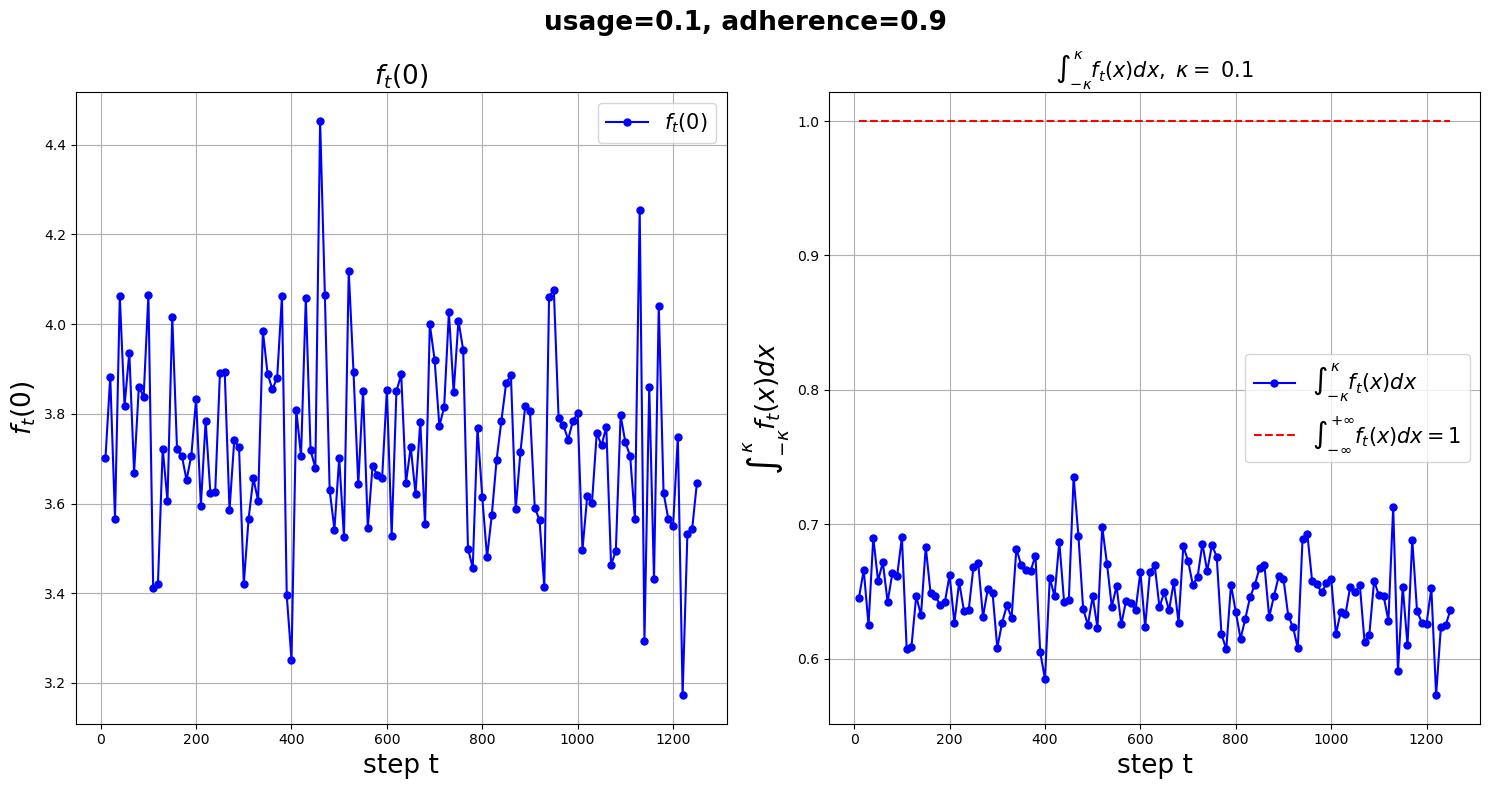

In [190]:
# plot f_t(0) and int_{-kappa}^{kappa}f_t(x)dx
plot, ax = plt.subplots(1, 2, figsize=(15, 8))
plot.suptitle(f"usage={usage}, adherence={adherence}", 
              fontsize=19, fontweight='bold')

ax[0].set_title(r"$f_t(0)$", fontsize=19, fontweight='bold')
ax[0].set_xlabel("step t", fontsize=19)
ax[0].set_ylabel(r"$f_t(0)$", fontsize=19)
ax[0].plot(steps, f_t0, label = r"$f_t(0)$", 
           color="blue", marker='o', markersize=5)
ax[0].legend(fontsize=15)
ax[0].grid()

ax[1].set_title(r"$\int_{-\kappa}^{\kappa}f_t(x)dx,~ \kappa = $ %.1f" % kappa, 
                fontsize=15)
ax[1].set_xlabel("step t", fontsize=19)
ax[1].set_ylabel(r"$\int_{-\kappa}^{\kappa}f_t(x)dx$", fontsize=19)
ax[1].plot(steps, integrals, label = r"$\int_{-\kappa}^{\kappa}f_t(x)dx$", 
           color="blue", marker='o', markersize=5)
ax[1].plot(steps, [1]*len(steps), '--', color="red", 
           label=r"$\int_{-\infty}^{+\infty}f_t(x)dx = 1$")
ax[1].legend(fontsize=15)
ax[1].grid()

plt.tight_layout()
plt.savefig(f"figures/f_t0_{usage}_{adherence}.png")
plt.show()

### Semigroup chek

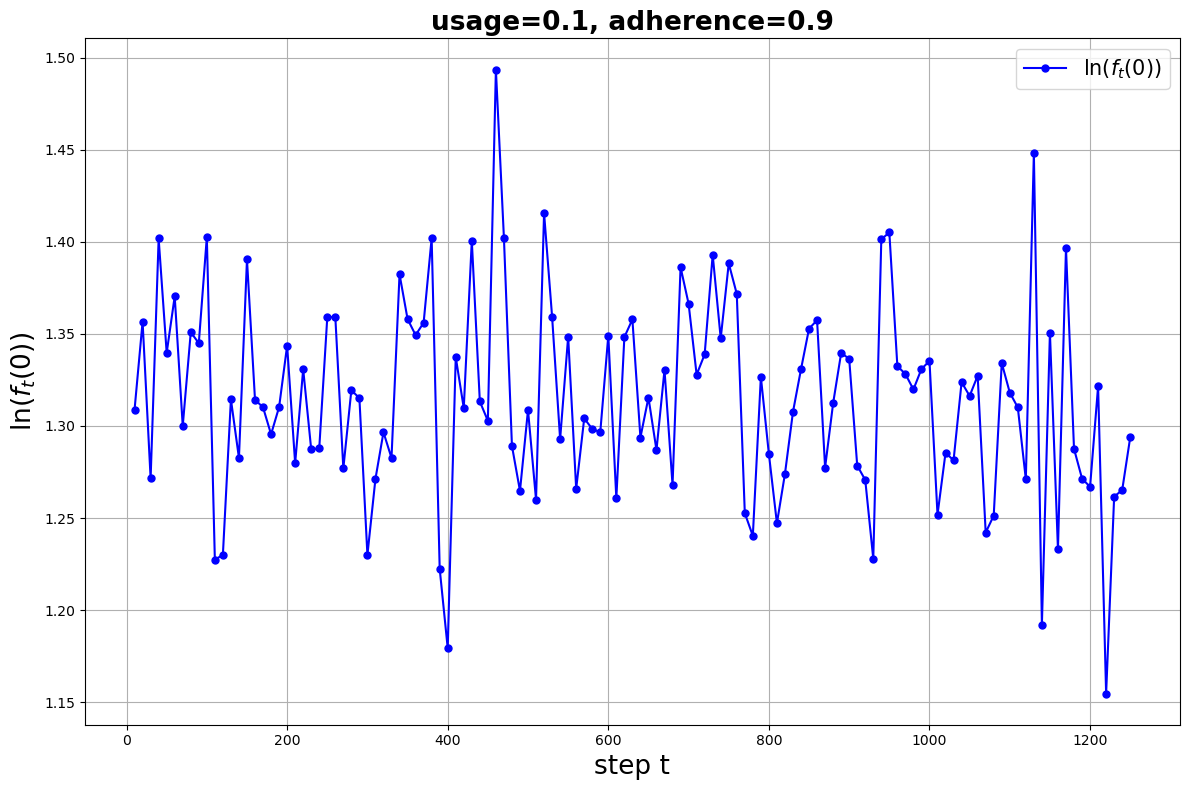

In [191]:
# plot ln(f_t(0)) 
plt.figure(figsize=(12, 8))
plt.title(f"usage={usage}, adherence={adherence}",
          fontsize=19, fontweight='bold')

plt.xlabel("step t", fontsize=19)
plt.ylabel(r"$\ln(f_t(0))$", fontsize=19)
plt.plot(steps, np.log(f_t0), label = r"$\ln(f_t(0))$", 
         color="blue", marker='o', markersize=5)

plt.legend(fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig(f"figures/semigroup_{usage}_{adherence}.png")
plt.show()

### Moments

In [192]:
# functions to calculate k-th moments
def double_fact(k):
    ret = 1
    for i in range(1, k + 1, 2):
        ret *= i
    return ret

def k_moment(k, sigma):
    if k % 2 == 1 : return 0
    else:
        return double_fact(k-1) * sigma**k

In [193]:
# calculationg sum_{k=0}^N moment_k
deviations = np.array(deviations)
N = 10**2
l1_norms = []
for deviation in deviations:
    l1_norm = 0
    for k in range(1, N+1):
        l1_norm += k_moment(k, deviation)
    l1_norms.append(l1_norm)

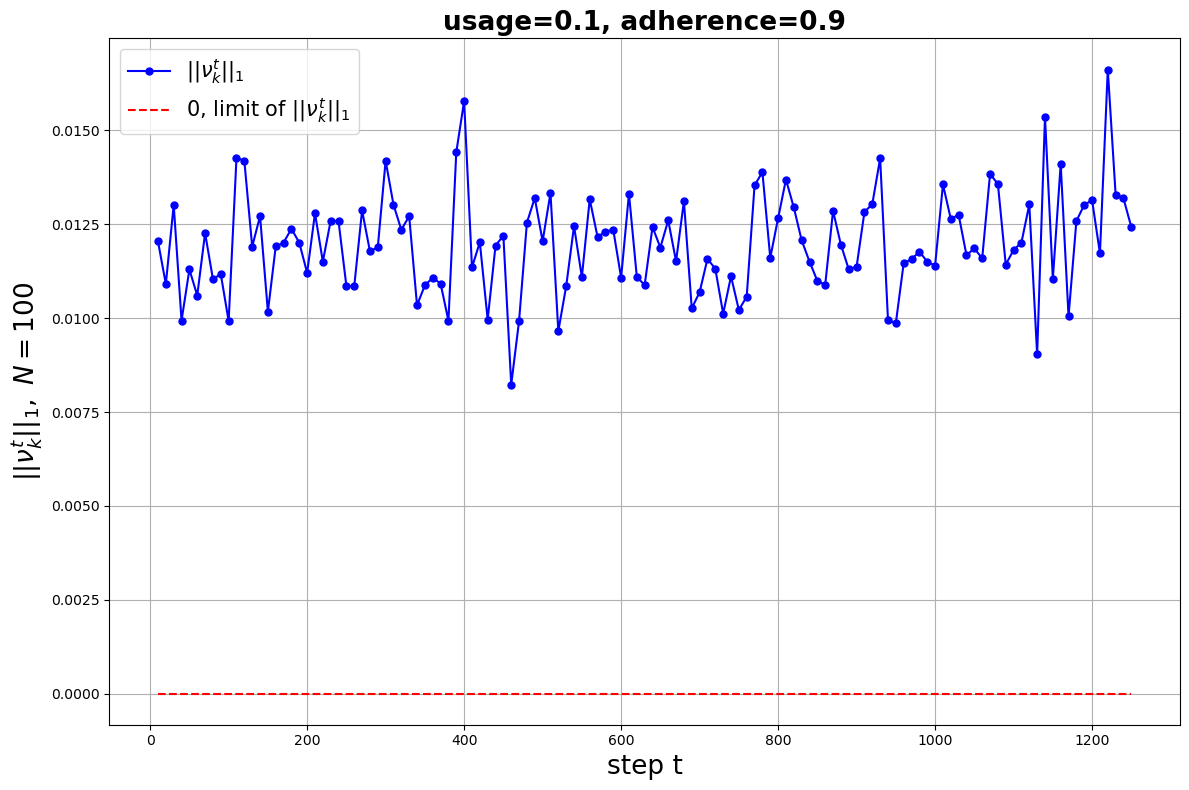

In [194]:
# plot sum_{k=0}^N moment_k
plt.figure(figsize=(12, 8))
plt.title(f"usage={usage}, adherence={adherence}",
          fontsize=19, fontweight='bold')

plt.xlabel("step t", fontsize=19)
plt.ylabel(r"$||\nu_k^t||_1, ~N = %i$" % N, fontsize=19)
plt.plot(steps, l1_norms, label = r"$||\nu_k^t||_1$", 
         color="blue", marker='o', markersize=5)
plt.plot(steps, [0]*len(steps), '--', label = r"0, limit of $||\nu_k^t||_1$", 
         color="red")
plt.legend(fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig(f"figures/moments_{usage}_{adherence}.png")
plt.show()